
![Malware](https://www.researchgate.net/profile/Bouchaib-Falah/publication/342996824/figure/fig1/AS:938135424864264@1600680323574/Visualizing-Malware-as-Grayscale-Image.ppm)

# Malware Detection
---
## Background
In the rapidly evolving landscape of cybersecurity, the detection and classification of malware have become critical to protecting systems and networks from malicious attacks. Traditional methods of malware detection often rely on signature-based approaches, which can struggle to keep pace with the increasing sophistication and variety of malware. Leveraging advanced machine learning techniques, particularly Convolutional Neural Networks (CNNs), presents a promising alternative. By transforming malware samples into visual representations, we can harness the power of image recognition to identify and classify malware with greater accuracy and efficiency. This project seeks to explore this innovative approach, contributing to the enhancement of cybersecurity measures.

## Objective
The primary objective of this project is to train a convolutional neural network (CNN) model to accurately predict and classify malware samples based on their grayscale image representations. The specific goals include:
1. Developing a robust CNN model that can distinguish between benign and malicious software with high precision.
2. Identifying distinctive structural and behavioral patterns of various malware families through their visual representations.
3. Enhancing the speed and reliability of malware detection processes, thereby improving overall cybersecurity defenses.

## Data
The dataset used for this project consists of grayscale images derived from both benign and malware samples. Each byte of a file is represented as a pixel value in these images, transforming the raw data into a format suitable for pattern recognition by CNNs. This visual representation captures the intricate structural and behavioral patterns of the malware, which are crucial for effective classification and detection.

The dataset is meticulously designed to include a diverse array of malware families, ensuring comprehensive coverage of different malware characteristics. By converting these samples into images, we facilitate the application of advanced image processing techniques, allowing the CNN model to learn and generalize the unique features of each class of software.

Through this approach, the project aims to push the boundaries of traditional malware detection methods, providing a more dynamic and responsive solution to the ever-growing threat of cyber attacks.

# Exploratory Data Analysis
---

### Finding image data dimensions

In [59]:
import os
from matplotlib.image import imread
import warnings
warnings.filterwarnings("ignore")

dim1 = []
dim2 = []

for place in os.listdir('/kaggle/input/malware-detection-with-images/DetectionDataset/dataset'):
    for i in os.listdir(f'/kaggle/input/malware-detection-with-images/DetectionDataset/dataset/{place}/'):
        img = imread(f'/kaggle/input/malware-detection-with-images/DetectionDataset/dataset/{place}/' + i)
        d1, d2 = img.shape[:2]
        dim1.append(d1)
        dim2.append(d2)

## Scatter Plot Explanation

As we explore our dataset, we'll use a scatter plot to visualize the relationship between two continuous variables, **dim1** and **dim2**. But what does a scatter plot actually show us?

## Breaking Down the Scatter Plot

- Each point on the plot represents a single observation or data point in our dataset.
- The x-axis represents the values of **dim1**.
- The y-axis represents the values of **dim2**.

## What Can We Learn from a Scatter Plot?

By examining the scatter plot, we can:

- Identify patterns or correlations between **dim1** and **dim2**.
- Determine the type of relationship between the two variables:
  - **Positive**: as **dim1** increases, **dim2** also tends to increase.
  - **Negative**: as **dim1** increases, **dim2** tends to decrease.
  - **Neutral**: no clear relationship between the two variables.
- Spot outliers or anomalies in the data that might be worth furtataset. in our dataset.

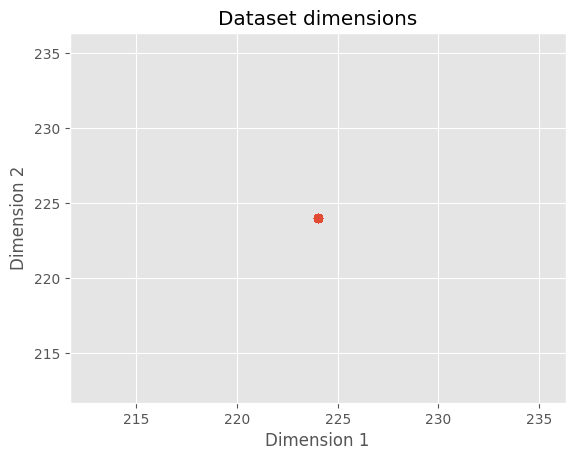

In [60]:
import matplotlib.pyplot as plt

plt.scatter(dim1, dim2)
plt.title('Dataset dimensions')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

### Finding data category distribution

In [5]:
number_classes = {'benign': len(os.listdir('/kaggle/input/malware-detection-with-images/DetectionDataset/dataset/benign')),
                  'malware': len(os.listdir('/kaggle/input/malware-detection-with-images/DetectionDataset/dataset/malware'))}

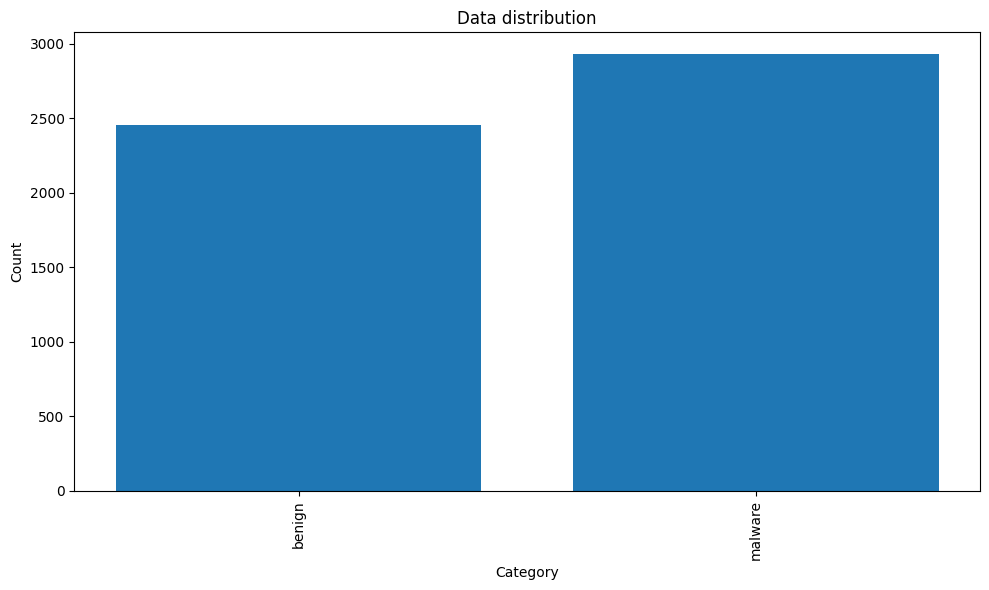

In [6]:
import pandas as pd

subject = pd.DataFrame.from_dict(number_classes, orient='index')
plt.figure(figsize=(10,6))
plt.bar(subject.index, subject[0])
plt.title('Data distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Inspecting data

2024-12-01 17:55:10.331260: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-01 17:55:10.331390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-01 17:55:10.468863: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


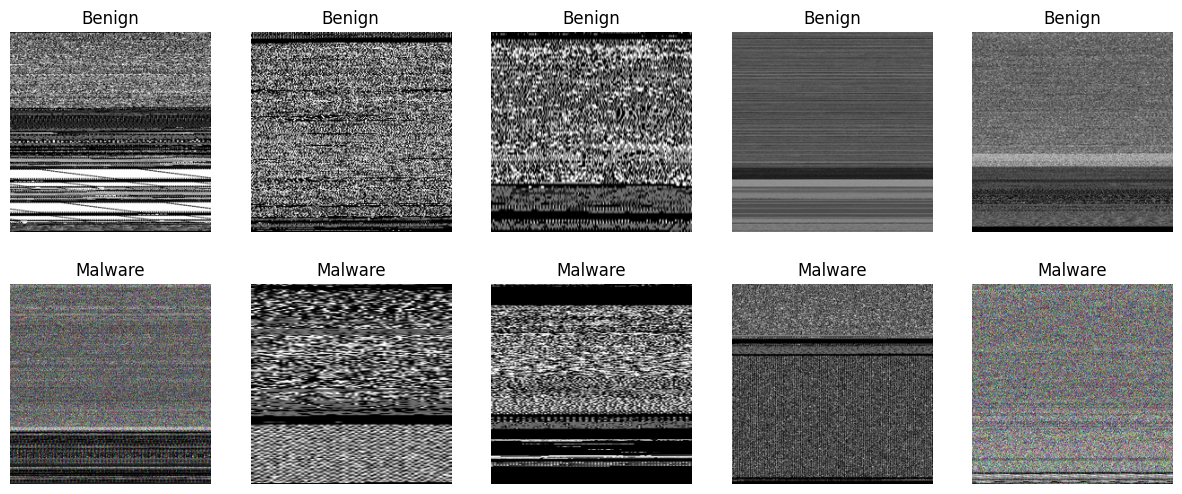

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

benign_path = '/kaggle/input/malware-detection-with-images/DetectionDataset/dataset/benign'
malware_path = '/kaggle/input/malware-detection-with-images/DetectionDataset/dataset/malware'

# Load Benign images
benign_images = [os.path.join(benign_path, filename) for filename in os.listdir(benign_path)]

# Load Malware images
malware_images = [os.path.join(malware_path, filename) for filename in os.listdir(malware_path)]

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# Display Benign images
for i, img_path in enumerate(benign_images[:5]):
    img = load_img(img_path, target_size=(224, 224))
    axs[0, i].imshow(img)
    axs[0, i].axis("off")
    axs[0, i].set_title('Benign')

# Display Malware images
for i, img_path in enumerate(malware_images[:5]):
    img = load_img(img_path, target_size=(224, 224))
    axs[1, i].imshow(img)
    axs[1, i].axis("off")
    axs[1, i].set_title('Malware')

plt.show()

In [8]:
from skimage import io, exposure, feature
from skimage.transform import rescale
import random

def img_exploration(img):
    image_resized = rescale(img, 0.2, anti_aliasing=True)
    increased_contrast = exposure.adjust_gamma(image_resized, 2)
    edge_img = feature.canny(image_resized, sigma=3)
    fig, ax = plt.subplots(1,4, figsize=(15,6))
    ax[0].imshow(image_resized); ax[0].set_title('image resized'); ax[0].axis("off")
    ax[1].imshow(increased_contrast); ax[1].set_title('increased contrast'); ax[1].axis("off")
    ax[2].imshow(edge_img); ax[2].set_title('detected edges'); ax[2].axis("off")
    ax[3].imshow(image_resized, cmap='gray'); ax[3].set_title('grayscale'); ax[3].axis("off")
    plt.show()

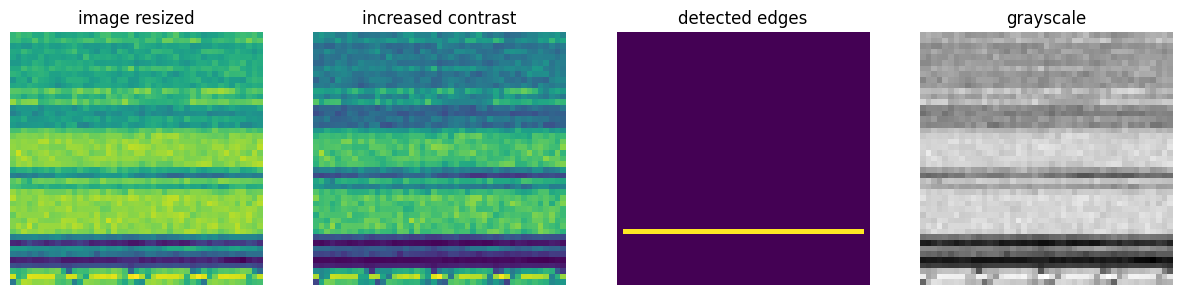

In [9]:
img = io.imread(malware_path + '/' + random.choice(os.listdir(malware_path)), as_gray=True)
img_exploration(img)

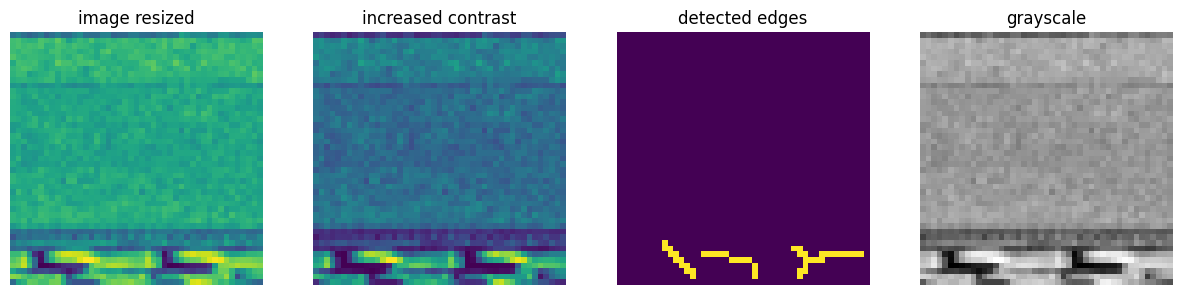

In [10]:
img = io.imread(malware_path + '/' + random.choice(os.listdir(malware_path)), as_gray=True)
img_exploration(img)

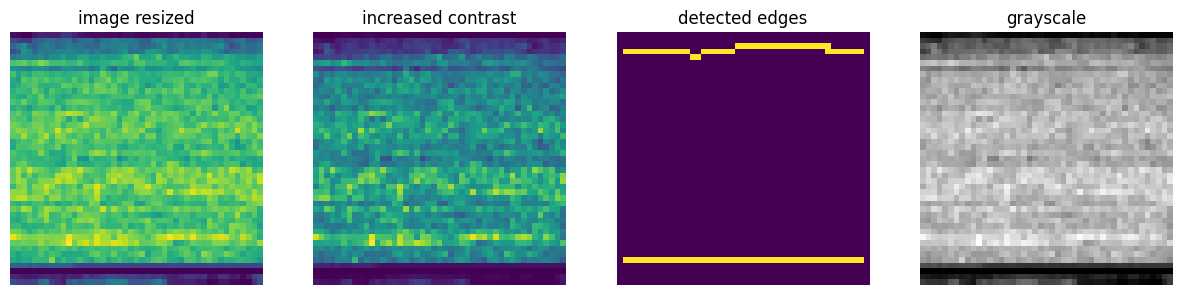

In [11]:
img = io.imread(malware_path + '/' + random.choice(os.listdir(malware_path)), as_gray=True)
img_exploration(img)

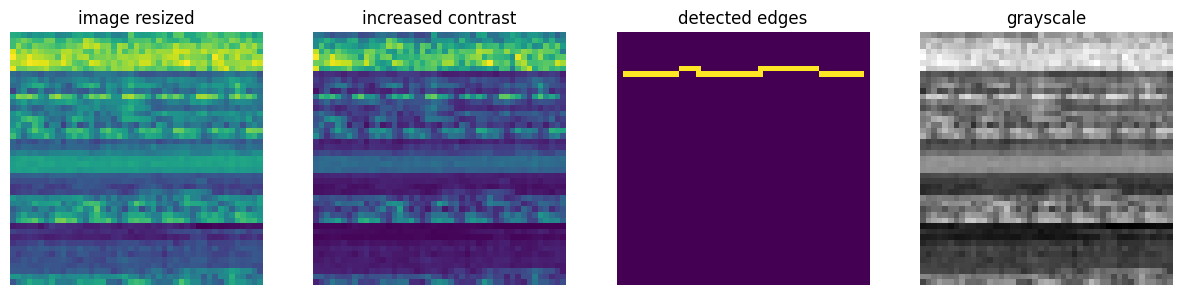

In [12]:
img = io.imread(malware_path + '/' + random.choice(os.listdir(malware_path)), as_gray=True)
img_exploration(img)

# Model Training
---

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def build_model(input_shape, output_dim):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

optimizer = Adam(learning_rate=0.001)
input_shape = (224, 224, 1)
output_dim = 2
model = build_model(input_shape, output_dim)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,390,018 (16.75 MB)

 Trainable params: 4,388,546 (16.74 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, 
                               zoom_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

In [15]:
local_path = '/kaggle/input/malware-detection-with-images/DetectionDataset/splittedDataset'
batch_size=64

train_image_gen = image_gen.flow_from_directory(directory=local_path+'/train', target_size=(224, 224), color_mode='grayscale', batch_size=batch_size,
                                                class_mode='categorical')
val_image_gen = image_gen.flow_from_directory(directory=local_path+'/val', target_size=(224, 224), color_mode='grayscale', batch_size=batch_size,
                                               class_mode='categorical', shuffle=False)
test_image_gen = image_gen.flow_from_directory(directory=local_path+'/test', target_size=(224, 224), color_mode='grayscale', batch_size=batch_size,
                                               class_mode='categorical', shuffle=False)

Found 3769 images belonging to 2 classes.
Found 808 images belonging to 2 classes.
Found 809 images belonging to 2 classes.


In [16]:
train_image_gen.class_indices

{'benign': 0, 'malware': 1}

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=0.0001, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.0001)

In [18]:
history = model.fit(
                    train_image_gen,
                    validation_data=val_image_gen,
                    epochs=30,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=1)

Epoch 1/30
 1/59 ━━━━━━━━━━━━━━━━━━━━ 27:38 29s/step - accuracy: 0.5312 - loss: 13.8351

I0000 00:00:1733075756.062067     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1733075756.078680     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


37/59 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6971 - loss: 12.6486   

W0000 00:00:1733075794.889652     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 0.7138 - loss: 11.9055

W0000 00:00:1733075805.618263     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


59/59 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7145 - loss: 11.8737 - val_accuracy: 0.4715 - val_loss: 16.1998 - learning_rate: 0.0010
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 23s 350ms/step - accuracy: 0.8109 - loss: 5.3661 - val_accuracy: 0.6188 - val_loss: 3.4538 - learning_rate: 0.0010
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 22s 338ms/step - accuracy: 0.8521 - loss: 2.4779 - val_accuracy: 0.7686 - val_loss: 1.8657 - learning_rate: 0.0010
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 22s 345ms/step - accuracy: 0.8712 - loss: 1.4194 - val_accuracy: 0.8193 - val_loss: 1.2550 - learning_rate: 0.0010
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 22s 342ms/step - accuracy: 0.8594 - loss: 1.0183 - val_accuracy: 0.7265 - val_loss: 1.4838 - learning_rate: 0.0010
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 22s 338ms/step - accuracy: 0.8821 - loss: 0.7541 - val_accuracy: 0.8205 - val_loss: 0.8121 - learning_rate: 0.0010
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 23s 349ms/step - accuracy: 0.9110 - loss: 0.5678 - val_a

In [19]:
plt.style.use('ggplot')

def performance_graph(history):
    history_df = pd.DataFrame(history.history)
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))
    history_df.loc[2:, ['loss', 'val_loss']].plot(ax=axs[0])
    history_df.loc[2:, ['accuracy', 'val_accuracy']].plot(ax=axs[1])
    
    print(("Best Validation Loss: {:0.4f}" +\
          "\nBest Validation accuracy: {:0.4f}")\
          .format(history_df['val_loss'].min(), 
                  history_df['val_accuracy'].max()))

Best Validation Loss: 0.3195
Best Validation accuracy: 0.9233


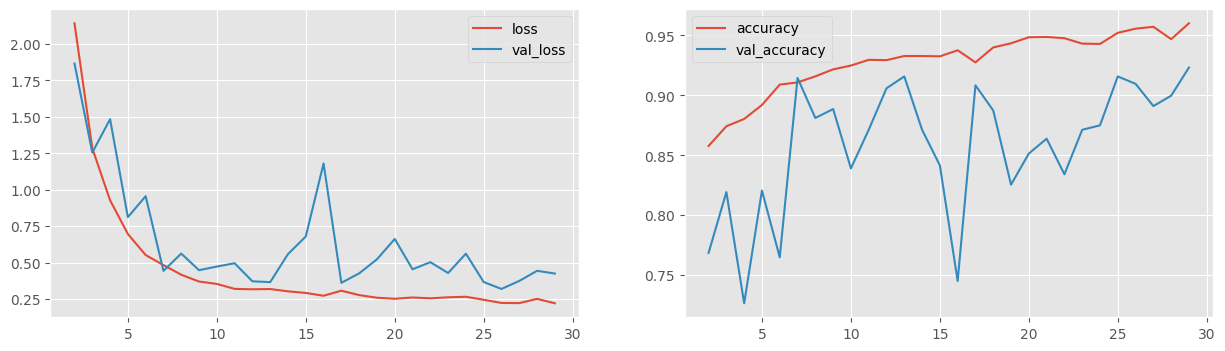

In [20]:
performance_graph(history)

# Evaluation
---

In [29]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

def performance_metrics(model, test_image_gen):
 
    y_pred = model.predict(test_image_gen)
    y_pred_classes = np.argmax(y_pred, axis=1)

    y_true = test_image_gen.classes
    target_names = list(test_image_gen.class_indices.keys())

    print(classification_report(y_true, y_pred_classes, target_names=target_names), '\n')

In [30]:
performance_metrics(model, test_image_gen)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step
              precision    recall  f1-score   support

      benign       0.97      0.89      0.93       369
     malware       0.92      0.97      0.94       440

    accuracy                           0.94       809
   macro avg       0.94      0.93      0.94       809
weighted avg       0.94      0.94      0.94       809
 



13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step


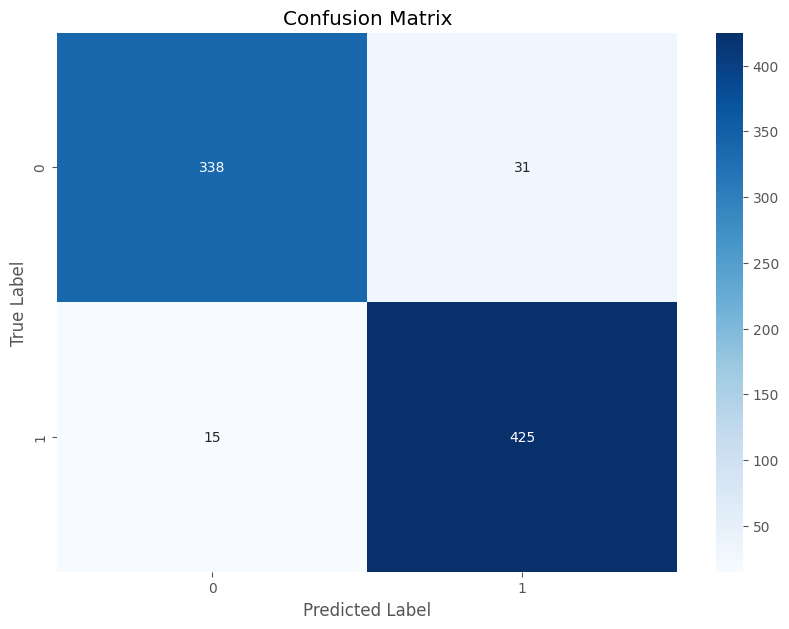

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_confusion_matrix(test_image_gen, model):
    Y_pred = model.predict(test_image_gen)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_image_gen.classes
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(test_image_gen, model)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step


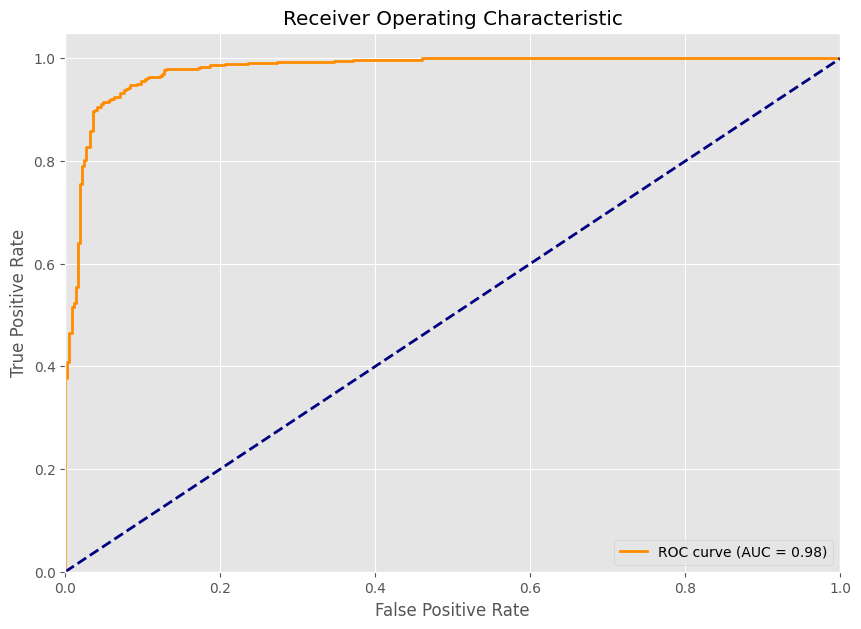

In [31]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

def plot_roc_curve(test_image_gen, model):
    Y_pred = model.predict(test_image_gen)
    y_true = test_image_gen.classes
    
    fpr, tpr, thresholds = roc_curve(y_true, Y_pred[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10,7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(test_image_gen, model)

### Predicting on randomly picked data

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


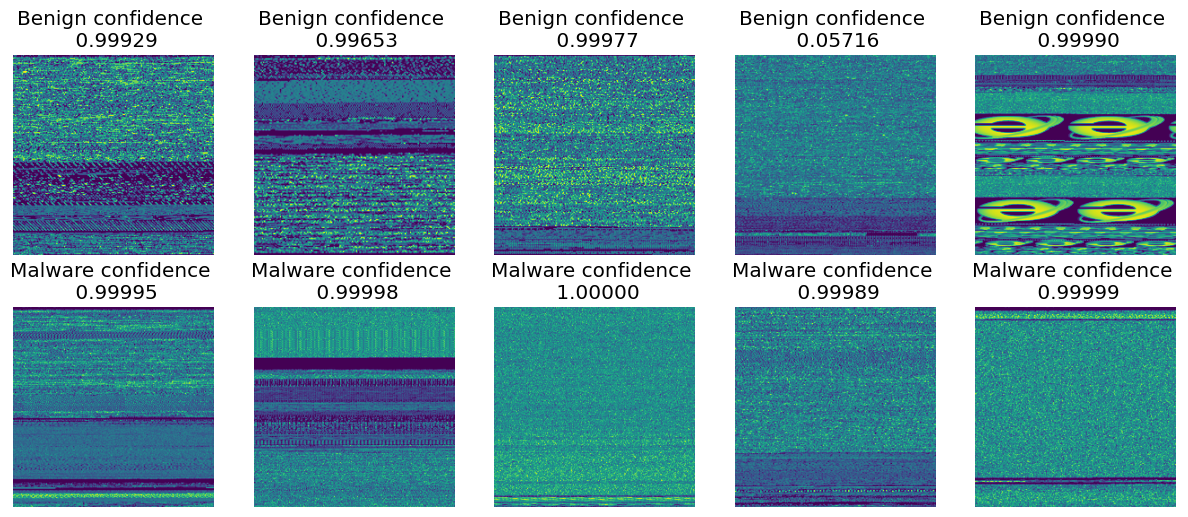

In [27]:
import random

test_benign_images = random.sample(os.listdir(local_path + '/test/benign'), 5)
test_malware_images = random.sample(os.listdir(local_path + '/test/malware'), 5)

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# Display Benign images
for i, img_path in enumerate(test_benign_images[:5]):
    
    img = load_img(local_path + '/test/benign/'+img_path, target_size=(224, 224), color_mode='grayscale')
    axs[0, i].imshow(img)
    axs[0, i].axis("off")
    
    image_arr = img_to_array(img)
    image_arr = np.expand_dims(image_arr, axis=0)
    
    axs[0, i].set_title(f'Benign confidence \n {model.predict(image_arr)[0][0]:.5f}')
    
# Display Malware images
for i, img_path in enumerate(test_malware_images[:5]):
    
    img = load_img(local_path + '/test/malware/'+img_path, target_size=(224, 224), color_mode='grayscale')
    axs[1, i].imshow(img)
    axs[1, i].axis("off")
    
    image_arr = img_to_array(img)
    image_arr = np.expand_dims(image_arr, axis=0)
    
    axs[1, i].set_title(f'Malware confidence \n {model.predict(image_arr)[0][1]:.5f}')

plt.show()

# RESEARCH PAPER TECHNIQUES

### 1. Handcrafted Feature Extraction
Gray Level Co-occurrence Matrix (GLCM), Local Binary Pattern (LBP), and Global Image Descriptor (GIST)

In [35]:
import os
import numpy as np
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
from skimage.transform import resize
from skimage.filters import gabor
from skimage import io
from sklearn.preprocessing import MinMaxScaler
import cv2

# Paths
dataset_path = "/kaggle/input/malware-detection-with-images/DetectionDataset/dataset"
output_features = {"benign": [], "malware": []}

# Helper function to calculate GLCM features
def glcm_features(image):
    glcm = graycomatrix(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)
    props = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
    return np.hstack([graycoprops(glcm, prop).flatten() for prop in props])

# Helper function for LBP
def lbp_features(image, radius=3, points=24):
    lbp = local_binary_pattern(image, points, radius, method="uniform")
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins))
    return hist / hist.sum()

# GIST Feature Placeholder
def gist_features(image):
    # Simplified version (resize and flatten)
    resized_image = resize(image, (32, 32))  # Resize to fixed size
    return resized_image.flatten()

In [2]:
# Process all images
for label in ["benign", "malware"]:
    for img_file in os.listdir(os.path.join(dataset_path, label)):
        img_path = os.path.join(dataset_path, label, img_file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        resized_image = resize(image, (224, 224))  # Standard size
        
        # Scale the image values to the range [0, 255] and convert to uint8
        scaler = MinMaxScaler(feature_range=(0, 255))
        scaled_image = scaler.fit_transform(resized_image)
        scaled_image = scaled_image.astype(np.uint8)
        
        # Extract features
        glcm = glcm_features(scaled_image)
        lbp = lbp_features(scaled_image)
        gist = gist_features(resized_image)
        
        # Combine all features
        features = np.hstack([glcm, lbp, gist])
        output_features[label].append(features)

# Save for later use
np.savez("handcrafted_features.npz", benign=np.array(output_features["benign"]), malware=np.array(output_features["malware"]))

### 2. CNN Feature Extraction
Pre-trained CNN with Transfer Learning

In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Step 1: Define the pre-trained model
mobile_net = MobileNetV2(include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Step 2: Create a data generator
datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,  # Adjust based on GPU memory
    class_mode=None,  # We're not training, so no labels needed
    shuffle=False  # Ensure consistent order of images for feature matching
)

# Step 3: Extract features in batches
cnn_features = mobile_net.predict(generator, verbose=1)

# Step 4: Save features for reuse
np.save("cnn_features_mobilenet.npy", cnn_features)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 5386 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/169 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step 

I0000 00:00:1732122858.429956     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


169/169 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step


In [38]:
features = np.load("/kaggle/input/cnn-features/tensorflow2/default/1/cnn_features_mobilenet.npy")
print("Feature shape:", features.shape) 

Feature shape: (5386, 1280)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load handcrafted features
handcrafted = np.load("/kaggle/input/hand-crafted-features/keras/default/1/handcrafted_features.npz")
benign_handcrafted = handcrafted["benign"]
malware_handcrafted = handcrafted["malware"]

# Verify feature dimensions
print("Handcrafted Feature Shapes - Benign:", benign_handcrafted.shape)
print("Handcrafted Feature Shapes - Malware:", malware_handcrafted.shape)

Handcrafted Feature Shapes - Benign: (2457, 1074)
Handcrafted Feature Shapes - Malware: (2929, 1074)


In [41]:
cnn_features = np.load("/kaggle/input/cnn-features/tensorflow2/default/1/cnn_features_mobilenet.npy")

# Separate CNN features into benign and malware
benign_cnn = cnn_features[:len(benign_handcrafted)]  # Assuming order is consistent
malware_cnn = cnn_features[len(benign_handcrafted):]

In [42]:
# Combine handcrafted and CNN features
benign_combined = np.hstack([benign_handcrafted, benign_cnn])
malware_combined = np.hstack([malware_handcrafted, malware_cnn])

In [43]:
# Prepare dataset
X = np.vstack([benign_combined, malware_combined])
y = np.array([0] * len(benign_combined) + [1] * len(malware_combined))  # 0: benign, 1: malware

print("Combined Feature Shape:", X.shape)

Combined Feature Shape: (5386, 2354)


In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [46]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9879


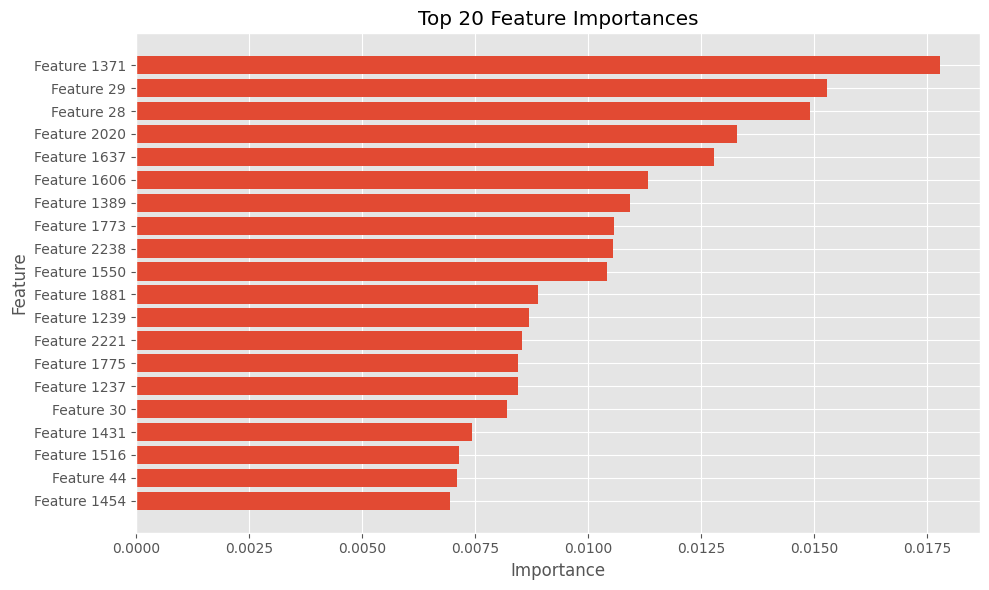

In [50]:
# Feature Importance
importances = clf.feature_importances_
feature_indices = np.argsort(importances)[-20:]  # Top 20 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_indices)), importances[feature_indices], align='center')
plt.yticks(range(len(feature_indices)), [f"Feature {i}" for i in feature_indices])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


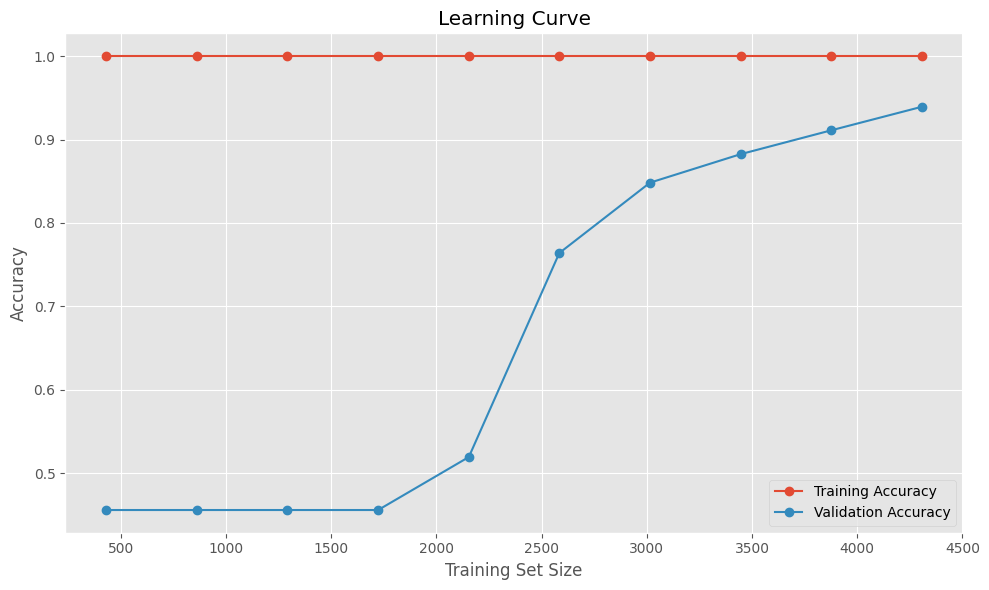

In [51]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


##### Dimensionality of Features:
    Number of features used after combining CNN and handcrafted features.
##### Most Informative Features:
    From feature importance, describe which type of features (handcrafted or CNN) had a higher contribution.

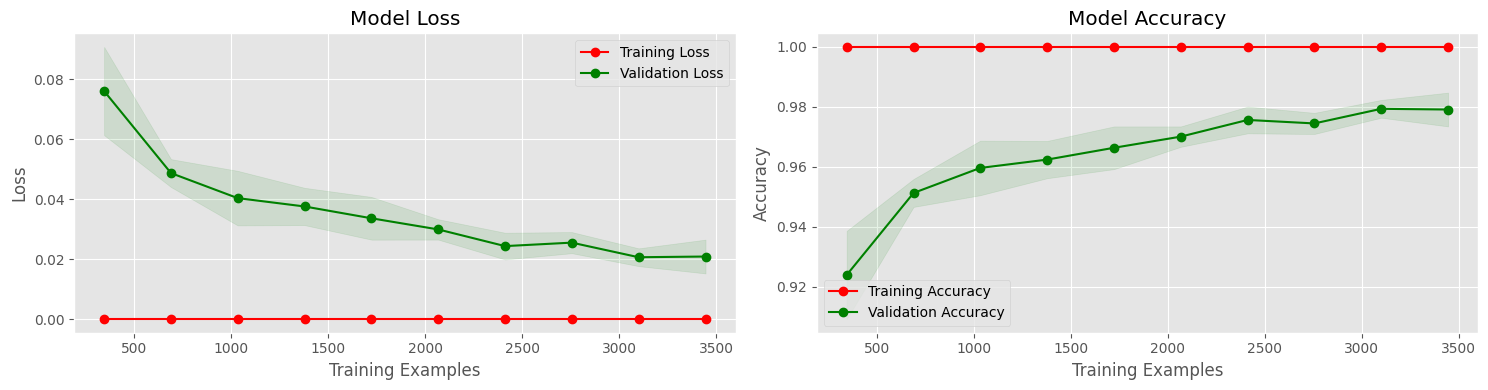

Best Validation Loss: 0.0207
Best Validation Accuracy: 0.9793


In [61]:
def performance_graph(clf, X_train, X_test, y_train, y_test):
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.model_selection import learning_curve

    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X_train, y_train, 
        cv=5, 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        scoring='accuracy'
    )

    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Create plot
    plt.figure(figsize=(15, 4))
    
    # Loss subplot (using test scores as a proxy for loss)
    plt.subplot(1, 2, 1)
    plt.title('Model Loss')
    plt.plot(train_sizes, 1 - train_mean, 'o-', color='r', label='Training Loss')
    plt.plot(train_sizes, 1 - test_mean, 'o-', color='g', label='Validation Loss')
    plt.fill_between(train_sizes, 1 - train_mean - train_std, 
                     1 - train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, 1 - test_mean - test_std, 
                     1 - test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training Examples')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    # Accuracy subplot
    plt.subplot(1, 2, 2)
    plt.title('Model Accuracy')
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Accuracy')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation Accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, 
                     train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, 
                     test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

    # Print best metrics
    print(f"Best Validation Loss: {1 - test_mean.max():.4f}")
    print(f"Best Validation Accuracy: {test_mean.max():.4f}")

# Call the function
performance_graph(clf, X_train, X_test, y_train, y_test)

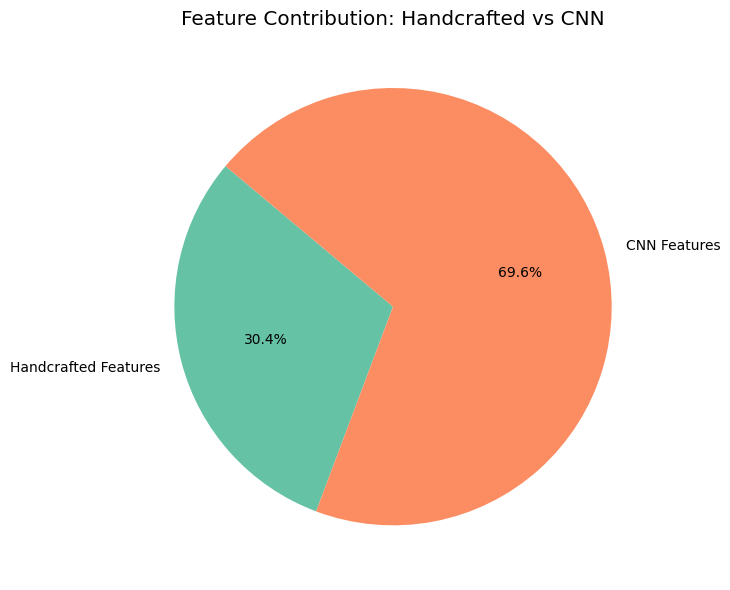

In [52]:
# Separate Handcrafted and CNN feature contributions
handcrafted_length = benign_handcrafted.shape[1]
cnn_length = benign_cnn.shape[1]

handcrafted_importance = np.sum(importances[:handcrafted_length])
cnn_importance = np.sum(importances[handcrafted_length:])

# Pie chart of feature contributions
contributions = [handcrafted_importance, cnn_importance]
labels = ['Handcrafted Features', 'CNN Features']

plt.figure(figsize=(8, 6))
plt.pie(contributions, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title("Feature Contribution: Handcrafted vs CNN")
plt.tight_layout()
plt.show()


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    roc_auc_score, 
    precision_recall_curve, 
    average_precision_score
)

# Predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       492
           1       0.99      0.99      0.99       586

    accuracy                           0.99      1078
   macro avg       0.99      0.99      0.99      1078
weighted avg       0.99      0.99      0.99      1078



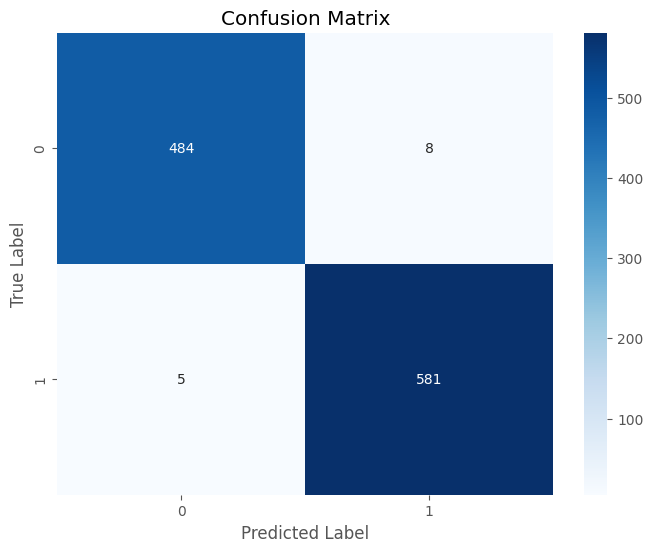

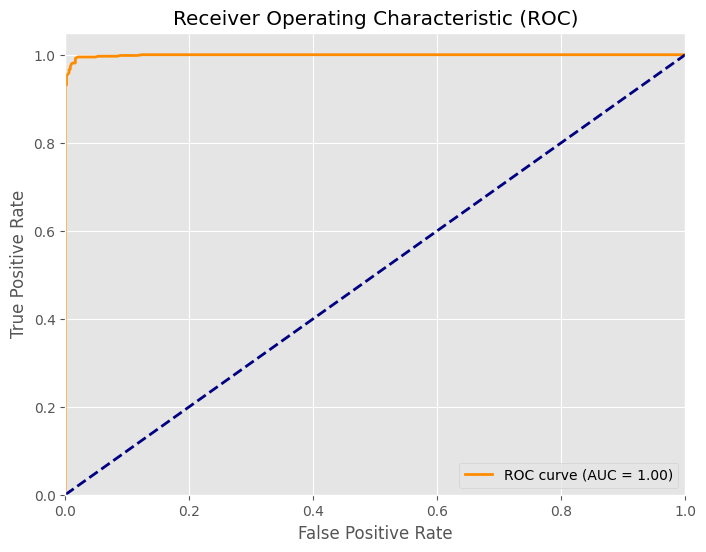

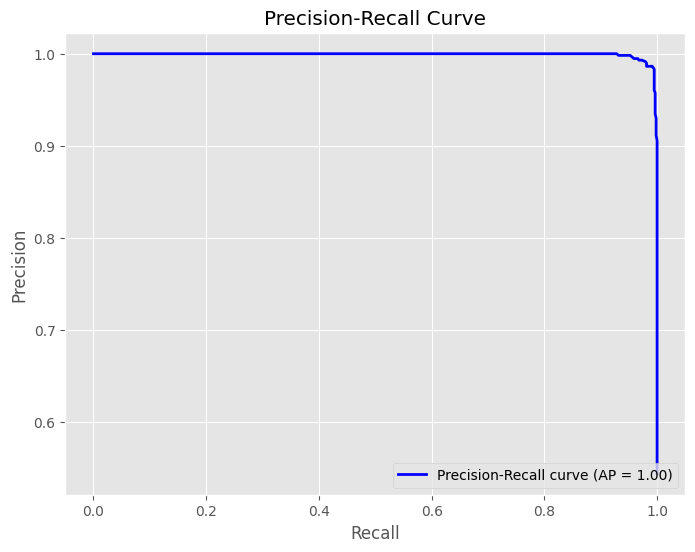

In [54]:
# Comprehensive Evaluation Function
def model_evaluation(y_true, y_pred, y_pred_proba):
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    avg_precision = average_precision_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, 
             label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()

# Run evaluation
model_evaluation(y_test, y_pred, y_pred_proba)

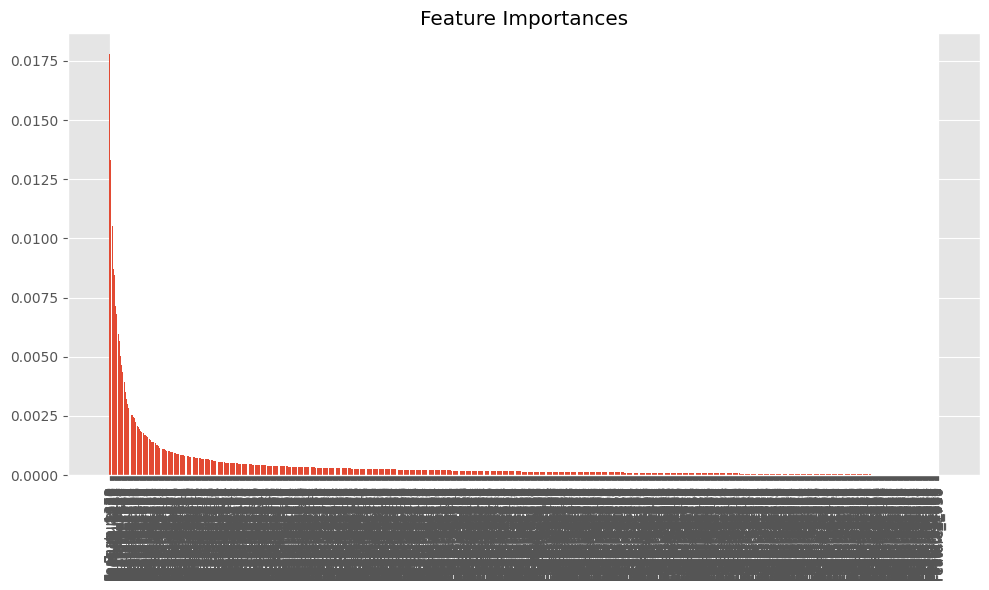

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(clf, feature_names=None):
    # Get feature importances
    importances = clf.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices])
    
    # Add feature names if provided
    if feature_names is not None:
        plt.xticks(range(len(importances)), 
                   [feature_names[i] for i in indices], 
                   rotation=90)
    
    plt.tight_layout()
    plt.show()

# You might want to create feature names based on your feature extraction
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
plot_feature_importance(clf, feature_names)